::<center>

# <font color='blue'>**DATA MINING PROJECT**


**TOPIC: MOVIE RECOMMENDATION SYSTEM**

**Instructor:**

| No. | Full Name |
|-------|-------|
| 1 | TS. Cao Thị Nhạn |
| 2 | Ths. Vũ Minh Sang |

**Sinh viên thực hiện**

| No. | Full Name | Student Code |
|-------|-------|-------|
| 1 | Nguyễn Quốc Khánh | 20521452 |
| 2 | Võ Lê Nhã Trang | 20522042 |
| 3 | Nguyễn Ngọc Hải Sơn | 20522052 |

</center>

# **CHAPTER 1. INTRODUCTION**

In this project,  we will use a movie dataset that is a part of MovieLens Datasets from Kaggle Dataset can be accessed [here](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset).

**The Movie Dataset** includes many files, these files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.


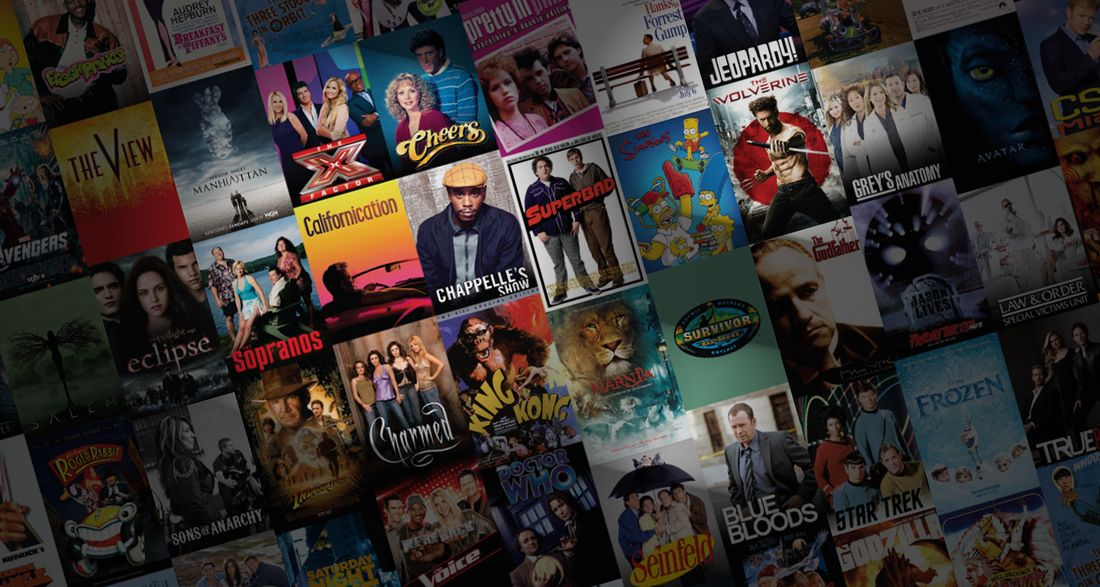

This dataset consists of the following files:

1. **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

2. **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

3. **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

4. **links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

5. **links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

6. **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

# **CHAPTER 2. DATA PREPROCESSING**

**Import libraries**

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
%matplotlib inline
import gdown
import zipfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Reading the Data**

**Dowload dataset from [here](https://drive.google.com/file/d/1rIZimDv28zLP78bT-TloeKX-yYAxacig/view?usp=sharing)**

In [ ]:
# Download the ZIP file from Google Drive
url = 'https://drive.google.com/uc?id=1rIZimDv28zLP78bT-TloeKX-yYAxacig'
output = '/content/file.zip'  # Path and name of the file after downloading
gdown.download(url, output, quiet=False)

# Extract the ZIP file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Change the path to the destination folder


Downloading...
From: https://drive.google.com/uc?id=1rIZimDv28zLP78bT-TloeKX-yYAxacig
To: /content/file.zip
100%|██████████| 237M/237M [00:02<00:00, 111MB/s]


In [ ]:
df_credits = pd.read_csv('/content/dataset/Dataset/credits.csv')
df_keywords = pd.read_csv('/content/dataset/Dataset/keywords.csv')
df_metadata = pd.read_csv('/content/dataset/Dataset/movies_metadata.csv', low_memory=False)

df_links = pd.read_csv('/content/dataset/Dataset/keywords.csv')
df_links_small = pd.read_csv('/content/dataset/Dataset/links_small.csv')

df_ratings = pd.read_csv('/content/dataset/Dataset/ratings.csv')
df_ratings_small = pd.read_csv('/content/dataset/Dataset/ratings_small.csv')

## **Exploratory Data Analysis (EDA)**

### **View dataset information**

In [ ]:
print('-'*20, ' SHAPES ', '-'*20)
print('1. Ratings: ', df_ratings.shape)
print('2. Links Small: ', df_links_small.shape)
print('3. Credits: ', df_credits.shape)
print('4. Keywords: ', df_keywords.shape)
print('5. Meta Data: ', df_metadata.shape)
print('6. Ratings Small: ', df_ratings_small.shape)
print('7. Links: ', df_links.shape)


print('\n\n')
print('='*20, ' COLUMNS ', '='*20)

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.columns)

print('\n', '-'*20, '2. Links Small ', '-'*20)
print(df_links_small.columns)

print('\n', '-'*20, '3. Credits ', '-'*20)
print(df_credits.columns)

print('\n', '-'*20, '4. Keywords ', '-'*20)
print(df_keywords.columns)

print('\n', '-'*20, '5. Meta Data ', '-'*20)
print(df_metadata.columns)

print('\n', '-'*20, '6. Ratings Small ', '-'*20)
print(df_ratings_small.columns)

print('\n', '-'*20, '7. Links ', '-'*20)
print(df_links.columns)

--------------------  SHAPES  --------------------
1. Ratings:  (26024289, 4)
2. Links Small:  (9125, 3)
3. Credits:  (45476, 3)
4. Keywords:  (46419, 2)
5. Meta Data:  (45466, 24)
6. Ratings Small:  (100004, 4)
7. Links:  (46419, 2)



====================  COLUMNS  ====================

 -------------------- 1. Ratings  --------------------
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

 -------------------- 2. Links Small  --------------------
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

 -------------------- 3. Credits  --------------------
Index(['cast', 'crew', 'id'], dtype='object')

 -------------------- 4. Keywords  --------------------
Index(['id', 'keywords'], dtype='object')

 -------------------- 5. Meta Data  --------------------
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
     

**Movie Metadata Dataset**

> **movies_metadata.csv file** is the main file that contains most of the important information about the movies, such as the title, genres, release date, and budget.

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

1.	adult: Indicates if the movie is X-Rated or Adult.
2.	belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
3.	budget: The budget of the movie in dollars.
4.	genres: A stringified list of dictionaries that list out all the genres associated with the movie.
5.	homepage: The Official Homepage of the move.
6.	id: The ID of the move.
7.	imdb_id: The IMDB ID of the movie.
8.	original_language: The language in which the movie was originally shot in.
9.	original_title: The original title of the movie.
10.	overview: A brief blurb of the movie.
11.	popularity: The Popularity Score assigned by TMDB.
12.	poster_path: The URL of the poster image.
13.	production_companies: A stringified list of production companies involved with the making of the movie.
14.	production_countries: A stringified list of countries where the movie was shot/produced in.
15.	release_date: Theatrical Release Date of the movie.
16.	revenue: The total revenue of the movie in dollars.
17.	runtime: The runtime of the movie in minutes.
18.	spoken_languages: A stringified list of spoken languages in the film.
19.	status: The status of the movie (Released, To Be Released, Announced, etc.)
20.	tagline: The tagline of the movie.
21.	title: The Official Title of the movie.
22.	video: Indicates if there is a video present of the movie with TMDB.
23.	vote_average: The average rating of the movie.
24.	vote_count: The number of votes by users, as counted by TMDB.


### **Identify missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

## **Drop Features**

**Columns to be Dropped**
- **original_title**: since title column is also included and original_title column has non-ASCII characters, it can be dropped.
- **homepage**: there will be no analysis depending on the homepage of the movie, this column is uselesss for this specific analysis
- **imdb_id**: both ratings.csv and keywords.csv has id column to match with metadata dataset, thus no need for this column.
- **overview & tagline**: no text analysis will be made in this notebook. For retrieving the most important words, keywords.csv can be used
- **video & poster_path**: no image, video related processing will be made
- **spoken_languages**: original_language is included, no need.
- **adult**: In adult column, only 9 True values are present, this information will not give us anything significant, thus, that column is also dropped.

We will remove the above columns, also remove duplicate rows/columns and any rows/columns of data that are either NaN or null will be removed.

In [ ]:
df_metadata["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [ ]:
drop_df = ["homepage", "poster_path", "video", "imdb_id", "overview", "original_title", "spoken_languages", "tagline", "adult"]
df_metadata = df_metadata.drop(drop_df, axis=1) # drops the selected columns

## **Remove duplicate and NaN/Null rows/columns**

In [ ]:
duplicated_records = df_metadata[df_metadata.duplicated()]
df_metadata = df_metadata.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
df_metadata.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

<ipython-input-13-24bbf31c4705>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row


**After the above processing, our metadata now has 16 columns and 45,449 rows.**

In [ ]:
df_metadata.shape

(45449, 15)

## **Remove no title columns**

Out of 45449 rows, there are 6 rows with no title. Let's drop that one, too.

In [ ]:
df_metadata.dropna(subset=["title"], inplace=True)

## **Convert object to numeric**

The types of id, popularity and budget is object, although they had to be numeric. Errors will be handled with coerce option, thus invalid parsing will be set as NaN.

In [ ]:
df_metadata["id"] = pd.to_numeric(df_metadata['id'], errors='coerce', downcast="integer")
df_metadata["popularity"] =pd.to_numeric(df_metadata['popularity'], errors='coerce', downcast="float")
df_metadata["budget"] =pd.to_numeric(df_metadata['budget'], errors='coerce', downcast="float")
df_metadata['release_date'] = pd.to_datetime(df_metadata['release_date'])
df_metadata['release_year'] = df_metadata['release_date'].dt.year

## **Convert data**

As we can see from the dataset itself and info() function, **`belongs_to_collection`** column has too many null entries, therefore instead of giving the collection name, we can convert the data to 0 and 1, 0 for not belonging and 1 for belonging.

In [ ]:
df_metadata['belongs_to_collection'] = df_metadata['belongs_to_collection'].fillna("None")
df_metadata['belongs_to_collection'] = (df_metadata['belongs_to_collection'] != "None").astype(int)

## **Handling remaining missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

runtime                  257
release_date              84
release_year              84
status                    81
original_language         11
belongs_to_collection      0
budget                     0
genres                     0
id                         0
popularity                 0
production_companies       0
production_countries       0
revenue                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64

For **status** column, less than 100 entries are null and it may be a good idea to fill these with most common data. For **runtime**, again a similar case occurs and it can be handled by filling NaN values with the mean.

In [ ]:
df_metadata["status"].fillna(df_metadata["status"].value_counts().idxmax(), inplace=True)
df_metadata["runtime"] = df_metadata["runtime"].replace(0, np.nan)
df_metadata["runtime"].fillna(df_metadata["runtime"].mean(), inplace=True)

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45443 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45443 non-null  int64         
 1   budget                 45443 non-null  float64       
 2   genres                 45443 non-null  object        
 3   id                     45443 non-null  int32         
 4   original_language      45432 non-null  object        
 5   popularity             45443 non-null  float32       
 6   production_companies   45443 non-null  object        
 7   production_countries   45443 non-null  object        
 8   release_date           45359 non-null  datetime64[ns]
 9   revenue                45443 non-null  float64       
 10  runtime                45443 non-null  float64       
 11  status                 45443 non-null  object        
 12  title                  45443 non-null  object        
 13  v

Since there are around 70 null release_date entries and filling that is not logical, they will be dropped, too. And also 1 row that has null as in column original_language may be dropped.

In [ ]:
df_metadata.dropna(subset=["release_date"],inplace=True)
df_metadata.dropna(subset=["original_language"],inplace=True)

**Now my meta data has run out of missing values**

In [ ]:
df_metadata.isnull().sum().sort_values(ascending = False)

belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
title                    0
vote_average             0
vote_count               0
release_year             0
dtype: int64

## **Converts json list to list**

There are some cells, which have stringified list of json inputs such as **genres, production_companies and production_countries**. For easier processing, these have to be converted into list of inputs. The function below achieves this:

In [ ]:
# converts json list to list of inputs (from the label specified with 'wanted' parameter)
def json_to_arr(cell, wanted = "name"):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

Let's apply this function to specified 3 parameters:

In [ ]:
df_metadata[['genres']] = df_metadata[['genres']].applymap(json_to_arr)
df_metadata[['production_countries']] = df_metadata[['production_countries']].applymap(lambda row: json_to_arr(row, "iso_3166_1"))
df_metadata[['production_companies']] = df_metadata[['production_companies']].applymap(json_to_arr)

In [ ]:
df_metadata[['genres', 'production_countries','production_companies']].head()

,genres,production_countries,production_companies
0,"[Animation, Comedy, Family]",[US],[Pixar Animation Studios]
1,"[Adventure, Fantasy, Family]",[US],"[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[Romance, Comedy]",[US],"[Warner Bros., Lancaster Gate]"
3,"[Comedy, Drama, Romance]",[US],[Twentieth Century Fox Film Corporation]
4,[Comedy],[US],"[Sandollar Productions, Touchstone Pictures]"


## **Handle Outlier**

### **budget and revenue**

Many entries of **budget and revenue** are 0. However, instead of 0, having NaN is more logical for seeing how many entries are actually available.

In [ ]:
df_metadata['budget'] = df_metadata['budget'].replace(0 , np.nan)
df_metadata['revenue'] = df_metadata['revenue'].replace(0 , np.nan)

In [ ]:
print("Number of rows with budget < 100: ", len((df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] < 100)])))
print("Number of rows with budget > 100 and < 1000: ", len(df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] > 100)
                                                              &(df_metadata["budget"] < 1000)]))
print("Number of rows with budget > 1000 and < 10000: ", len(df_metadata[(df_metadata["budget"].notna())&(df_metadata["budget"] > 1000)
                                                              &(df_metadata["budget"] < 10000)]))

Number of rows with budget < 100:  137
Number of rows with budget > 100 and < 1000:  101
Number of rows with budget > 1000 and < 10000:  52


There are some rows that have a budget and revenue value, that are not actually scaled. By checking some of the notebooks shared, I have decided to move on with the scaling function below. For example, if the value is 1, then it scales to 1 million. If an example will be given from the true data:
- id: 17402
- Title: Miami Rhapsody
- Production Company: Hollywood Pictures
- Date: 1995-01-27
- Budget: 6
- Revenue: 5 (by looking IMDB, actual revenue can be seen as around 5 million)

In [ ]:
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num

In [ ]:
df_metadata[['budget', 'revenue']] = df_metadata[['budget', 'revenue']].applymap(scale_money)

After these steps, the columns can be osberved to see how many null or NaN entries there are. So, a heatmap and data is below:

In [ ]:
null_counts = df_metadata.isna().sum()
print(null_counts)

belongs_to_collection        0
budget                   36463
genres                    2383
id                           0
original_language            0
popularity                   0
production_companies     11787
production_countries      6206
release_date                 0
revenue                  37944
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64


### **genres and country**

In [ ]:
print("NaN Genres Count: ", df_metadata["genres"].isna().sum())
print("NaN Revenue Count: ", df_metadata["revenue"].isna().sum())
print("NaN Budget Count: ", df_metadata["budget"].isna().sum())
print("NaN Production Company Count: ", df_metadata["production_companies"].isna().sum())
print("NaN Production Country Count: ", df_metadata["production_countries"].isna().sum())

NaN Genres Count:  2383
NaN Revenue Count:  37944
NaN Budget Count:  36463
NaN Production Company Count:  11787
NaN Production Country Count:  6206


For **revenue, budget and production company** filling the values with the most appearing entry or mean is not so logical, since the number of null or NaN entries are huge (More than %20 of whoel dataset). But for **genres and country** it may be done. The function below analyzes the most occuring values for columns in list formats.

In [ ]:
# returns the values and occurance times or "limiter" amount of different parameters in a 2D list
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result:
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i)
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

<Axes: xlabel='genres'>

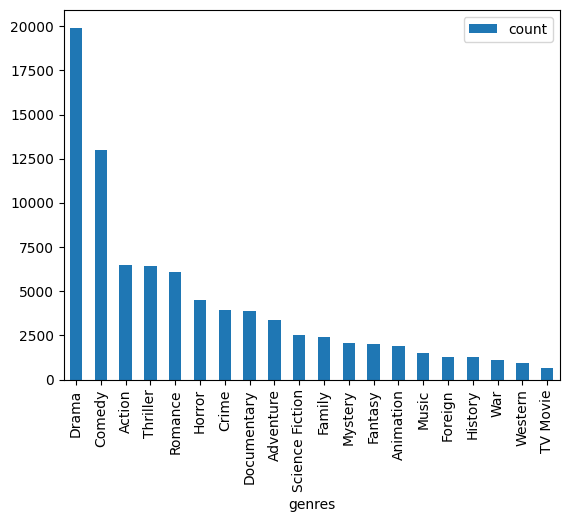

In [ ]:
genres_occur = list_counter(df_metadata["genres"].values, log=False)
genres = pd.DataFrame.from_records(genres_occur, columns=["genres", "count"])
genres.plot(kind = 'bar', x="genres")

<Axes: xlabel='countries'>

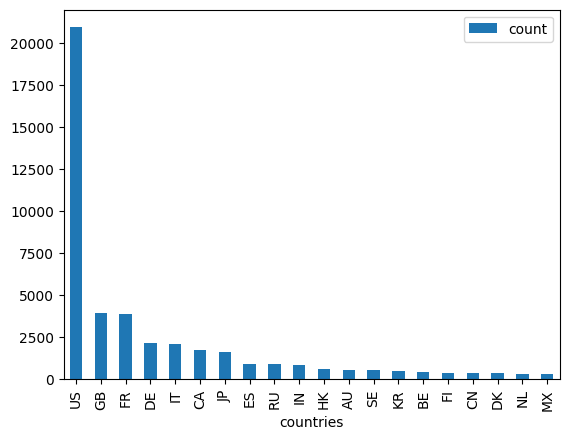

In [ ]:
countries_occur = list_counter(df_metadata["production_countries"].values, log=False)
countries = pd.DataFrame.from_records(countries_occur, columns=["countries", "count"])
countries.head(20).plot(kind = 'bar', x="countries")

In **genres**, **Drama** is the most occurring one with 20189 and in **production_countries**, **US** is the most frequent entry. These can be placed into NA cells of these columns:

In [ ]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [ ]:
df_metadata[['genres']] = df_metadata[['genres']].applymap(lambda row:
                                        fill_na_with_list(row, [genres_occur[0][0]]))
df_metadata[['production_countries']] = df_metadata[['production_countries']].applymap(lambda row:
                                        fill_na_with_list(row, [countries_occur[0][0]]))

## **Keyword Data**

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


As one can see, **keywords** format is stringified list of json and it can be converted to simple list with using the function written above and problematic ones can be calculated:

In [ ]:
df_keywords["keywords"] = df_keywords[['keywords']].applymap(json_to_arr)

In [ ]:
df_keywords["keywords"]

0                                     [jealousy, toy, boy]
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4                       [baby, midlife crisis, confidence]
                               ...                        
46414                                        [tragic love]
46415                                [artist, play, pinoy]
46416                                                  NaN
46417                                                  NaN
46418                                                  NaN
Name: keywords, Length: 46419, dtype: object

### **Check null values and drop**

In [ ]:
null_counts = df_keywords.isna().sum()
print(null_counts)

id              0
keywords    14795
dtype: int64


In [ ]:
df_keywords.dropna(inplace=True)

### **Merged data**

Since id parameters in both metadata and keywords directing to the same movie, the datasets can be merged.

In [ ]:
df_key_meta = pd.merge(df_metadata, df_keywords, on=['id'], how='left')

In [ ]:
df_key_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45890 entries, 0 to 45889
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45890 non-null  int64         
 1   budget                 8974 non-null   float64       
 2   genres                 45890 non-null  object        
 3   id                     45890 non-null  int32         
 4   original_language      45890 non-null  object        
 5   popularity             45890 non-null  float32       
 6   production_companies   33983 non-null  object        
 7   production_countries   45890 non-null  object        
 8   release_date           45890 non-null  datetime64[ns]
 9   revenue                7473 non-null   float64       
 10  runtime                45890 non-null  float64       
 11  status                 45890 non-null  object        
 12  title                  45890 non-null  object        
 13  v

## **Credit Data**

### **Get Director**

In [ ]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


When it comes to a movie, people often pay attention to the director and their role in the filmmaking process. The director plays a crucial role in shaping the style and ideas of the movie. Therefore, for many film enthusiasts, knowing who the director is can be an important factor in evaluating and choosing to watch a film.

So we will filter out **director** from **crew** and drop **crew** columns.

In [ ]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df_credits['director'] = df_credits['crew'].apply(get_director)
df_credits.drop(["crew"], axis=1, inplace=True)

In [ ]:
df_credits.head()

,cast,id,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",31357,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...",11862,Charles Shyer


Now since cast type is stringified list of json, we can again extract the names from the cast.


In [ ]:
df_credits["cast"] = df_credits[['cast']].applymap(json_to_arr)

In [ ]:
df_credits.head()

,cast,id,director
0,"[Tom Hanks, Tim Allen, Don Rickles]",862,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",8844,Joe Johnston
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",15602,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",31357,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short]",11862,Charles Shyer


If there are cells with both missing cast and director columns, they should be dropped:

In [ ]:
print("Entries with no cast:", len(df_credits[df_credits["cast"].isna()]))
print("Entries with no directors:", len(df_credits[df_credits["director"].isna()]))
print("Entries missing both:", len(df_credits[(df_credits["cast"].isna())&(df_credits["director"].isna())]))
df_credits.drop(df_credits[(df_credits["cast"].isna())&(df_credits["director"].isna())].index, inplace=True)

Entries with no cast: 2418
Entries with no directors: 887
Entries missing both: 437


### **Merged**

The **id** of metadata and **id** of credits columns point to the same movies, thus, both datasets can be converged.

In [ ]:
df_merged = pd.merge(df_key_meta, df_credits, on=['id'], how='left')

In [ ]:
df_merged.shape

(45976, 19)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45976 entries, 0 to 45975
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45976 non-null  int64         
 1   budget                 9010 non-null   float64       
 2   genres                 45976 non-null  object        
 3   id                     45976 non-null  int32         
 4   original_language      45976 non-null  object        
 5   popularity             45976 non-null  float32       
 6   production_companies   34047 non-null  object        
 7   production_countries   45976 non-null  object        
 8   release_date           45976 non-null  datetime64[ns]
 9   revenue                7505 non-null   float64       
 10  runtime                45976 non-null  float64       
 11  status                 45976 non-null  object        
 12  title                  45976 non-null  object        
 13  v

**Merged data has 45.976 entries and 19 columns**

In [ ]:
df_merged.head(10)

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,keywords,cast,director
0,1,30000000.0,"[Animation, Comedy, Family]",862,en,21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995.0,"[jealousy, toy, boy]","[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
2,1,NaN,"[Romance, Comedy]",15602,en,11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,NaN,101.0,Released,Grumpier Old Men,6.5,92.0,1995.0,"[fishing, best friend, duringcreditsstinger]","[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch
3,0,16000000.0,"[Comedy, Drama, Romance]",31357,en,3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker
4,1,NaN,[Comedy],11862,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995.0,"[baby, midlife crisis, confidence]","[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer
5,0,60000000.0,"[Action, Crime, Drama]",949,en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[US],1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,1995.0,"[robbery, detective, bank]","[Al Pacino, Robert De Niro, Val Kilmer]",Michael Mann
6,0,58000000.0,"[Comedy, Romance]",11860,en,6.677277,"[Paramount Pictures, Scott Rudin Productions, ...","[DE, US]",1995-12-15,NaN,127.0,Released,Sabrina,6.2,141.0,1995.0,"[paris, brother brother relationship, chauffeur]","[Harrison Ford, Julia Ormond, Greg Kinnear]",Sydney Pollack
7,0,NaN,"[Action, Adventure, Drama]",45325,en,2.561161,[Walt Disney Pictures],[US],1995-12-22,NaN,97.0,Released,Tom and Huck,5.4,45.0,1995.0,NaN,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",Peter Hewitt
8,0,35000000.0,"[Action, Adventure, Thriller]",9091,en,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[US],1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0,1995.0,"[terrorist, hostage, explosive]","[Jean-Claude Van Damme, Powers Boothe, Dorian ...",Peter Hyams
9,1,58000000.0,"[Adventure, Action, Thriller]",710,en,14.686036,"[United Artists, Eon Productions]","[GB, US]",1995-11-16,352194034.0,130.0,Released,GoldenEye,6.6,1194.0,1995.0,"[cuba, falsely accused, secret identity]","[Pierce Brosnan, Sean Bean, Izabella Scorupco]",Martin Campbell


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45976 entries, 0 to 45975
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45976 non-null  int64         
 1   budget                 9010 non-null   float64       
 2   genres                 45976 non-null  object        
 3   id                     45976 non-null  int32         
 4   original_language      45976 non-null  object        
 5   popularity             45976 non-null  float32       
 6   production_companies   34047 non-null  object        
 7   production_countries   45976 non-null  object        
 8   release_date           45976 non-null  datetime64[ns]
 9   revenue                7505 non-null   float64       
 10  runtime                45976 non-null  float64       
 11  status                 45976 non-null  object        
 12  title                  45976 non-null  object        
 13  v

In [ ]:
new_df = df_merged[["id", "title", "tags"]]

In [ ]:
df["genres"].head(10)

0      [Animation, Comedy, Family]
1     [Adventure, Fantasy, Family]
2                [Romance, Comedy]
3         [Comedy, Drama, Romance]
4                         [Comedy]
5           [Action, Crime, Drama]
6                [Comedy, Romance]
7       [Action, Adventure, Drama]
8    [Action, Adventure, Thriller]
9    [Adventure, Action, Thriller]
Name: genres, dtype: object

# **CHAPTER 3. MODEL BUILDING**

## **Simple Recommender**

## **Content-based Filtering**

## **Collaborative Filtering (CF)**

### **User-based Collaborative Filtering**

### **Item-based Collaborative Filtering**

## **Hybrid Recommender Systems**

# **CHAPTER 4. EVALUATION MODEL**